In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [13]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [3]:
# Load data and transform
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

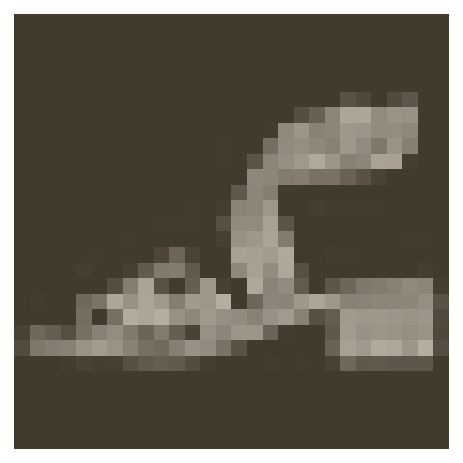

In [4]:
# show an image
images, labels = next(iter(trainloader))
imshow(images[0,:])
plt.show()

In [11]:
def linear_model(learning_rate=0.001, epochs=20, dataset=None):
    
    # Define my model
    model = nn.Sequential(nn.Linear(784, 256),
                          nn.ReLU(),
                          nn.Linear(256, 128),
                          nn.ReLU(),
                          nn.Linear(128, 64),
                          nn.ReLU(),
                          nn.Linear(64, 10),
                          nn.LogSoftmax(dim=1))
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    
    for e in range(epochs):
        running_loss = 0

        for images, labels in dataset:
            
            optimizer.zero_grad()
            images = images.view(images.shape[0], -1)
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        else:
            print (f'Loss = {running_loss/len(trainloader)}')

        losses.append(running_loss/len(trainloader))
    
    return model, losses

In [29]:
model_0, losses = linear_model(learning_rate=0.005, epochs=20, dataset=trainloader)

Loss = 0.5329763150132542
Loss = 0.4110986596739877
Loss = 0.38221088487869387
Loss = 0.359220037359927
Loss = 0.34351311561300046
Loss = 0.3322212963041339
Loss = 0.32760793080271433
Loss = 0.3187428833976356
Loss = 0.31379076750325496
Loss = 0.3028393682997936
Loss = 0.3071310613582383
Loss = 0.2873831820775514
Loss = 0.2899983875246953
Loss = 0.2938026916672553
Loss = 0.28345243869496306
Loss = 0.2861016691604784
Loss = 0.27689449910892605
Loss = 0.2685175808404745
Loss = 0.26829813401709235
Loss = 0.27508382284358496


In [31]:
model_1, losses_1 = linear_model(learning_rate=0.002, epochs=20, dataset=trainloader)

Loss = 0.508472918622148
Loss = 0.38111790204480256
Loss = 0.3451921691788412
Loss = 0.32105886667712663
Loss = 0.3031859474935765
Loss = 0.2888719005418866
Loss = 0.27980863678255186
Loss = 0.26885159802970604
Loss = 0.25423319026160596
Loss = 0.2501587364306328
Loss = 0.24077427646975275
Loss = 0.23392040871465003
Loss = 0.22452437050386406
Loss = 0.22089184371869702
Loss = 0.2136886447890481
Loss = 0.20760980056626582
Loss = 0.1989641367618654
Loss = 0.1985536624989244
Loss = 0.19244241293495906
Loss = 0.1879608848694164


In [32]:
model_2, losses_2 = linear_model(learning_rate=0.001, epochs=20, dataset=trainloader)

Loss = 0.5183035954991891
Loss = 0.37475353589793764
Loss = 0.3388366132561586
Loss = 0.31310752457551866
Loss = 0.29615016148955836
Loss = 0.27978174873728995
Loss = 0.263245774230469
Loss = 0.25087355197206745
Loss = 0.24157290930734643
Loss = 0.2308735694212001
Loss = 0.22464031853210698
Loss = 0.21233948289172483
Loss = 0.20372572032484546
Loss = 0.1948552212552793
Loss = 0.18682045296930683
Loss = 0.1810631553179769
Loss = 0.17244537148489628
Loss = 0.16480740752102915
Loss = 0.15821212304156346
Loss = 0.15270275264970465


In [33]:
model_3, losses_3 = linear_model(learning_rate=0.0005, epochs=20, dataset=trainloader)

Loss = 0.5500994022689394
Loss = 0.3828221998695753
Loss = 0.3408164220022113
Loss = 0.3166120560533965
Loss = 0.2956260013650221
Loss = 0.28238681261378057
Loss = 0.2638965809840892
Loss = 0.25314025388661227
Loss = 0.24049732982635752
Loss = 0.2309567037382042
Loss = 0.22004398002203848
Loss = 0.21081338317663684
Loss = 0.20159534250955974
Loss = 0.19385664311172104
Loss = 0.18545120980725613
Loss = 0.18064126601891478
Loss = 0.1680137990638296
Loss = 0.1622489349249361
Loss = 0.1570105715148421
Loss = 0.15098437056469638


In [5]:
def linear_model(learning_rate=0.001, epochs=20, dataset=None):
    
    # Define my model
    model = nn.Sequential(nn.Linear(784, 128),
                          nn.ReLU(),
                          nn.Linear(128, 64),
                          nn.ReLU(),
                          nn.Linear(64, 10),
                          nn.LogSoftmax(dim=1))
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    
    for e in range(epochs):
        running_loss = 0

        for images, labels in dataset:
            
            optimizer.zero_grad()
            images = images.view(images.shape[0], -1)
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        else:
            print (f'Loss = {running_loss/len(trainloader)}')

        losses.append(running_loss/len(trainloader))
    
    return model, losses

In [36]:
model_0, losses_0 = linear_model(learning_rate=0.005, epochs=20, dataset=trainloader)

Loss = 0.5090929095202418
Loss = 0.40463538733181925
Loss = 0.3707030719912637
Loss = 0.35363923849613427
Loss = 0.3382063672137159
Loss = 0.33239723710236013
Loss = 0.32018753948972933
Loss = 0.3102551768980682
Loss = 0.30874881806817134
Loss = 0.30121132038009446
Loss = 0.3003759566209972
Loss = 0.2914863798632296
Loss = 0.28179340460883784
Loss = 0.2828654621058563
Loss = 0.2780798884438299
Loss = 0.2765358709084835
Loss = 0.27714256555445665
Loss = 0.27276813255539584
Loss = 0.2656593975076861
Loss = 0.26491311278297447


In [6]:
model_1, losses_1 = linear_model(learning_rate=0.002, epochs=20, dataset=trainloader)

Loss = 0.4959626724915718
Loss = 0.38129370909001525
Loss = 0.342362722560668
Loss = 0.31897420175611846
Loss = 0.30263544903444584
Loss = 0.28886782455800186
Loss = 0.27703066612643473
Loss = 0.26669876673804926
Loss = 0.258721731750092
Loss = 0.25102798110926583
Loss = 0.24191581286283445
Loss = 0.23692054511991137
Loss = 0.22906810180274154
Loss = 0.22237422770814602
Loss = 0.21887771670085027
Loss = 0.21126783577633945
Loss = 0.21109807400751723
Loss = 0.20246582411166067
Loss = 0.19744332421070604
Loss = 0.19352937284023014


In [7]:
model_2, losses_2 = linear_model(learning_rate=0.001, epochs=20, dataset=trainloader)

Loss = 0.5156111275908281
Loss = 0.3780209472470446
Loss = 0.34030484009399087
Loss = 0.31421140744996223
Loss = 0.29583659070704793
Loss = 0.2834290783844396
Loss = 0.26850385323706977
Loss = 0.2579657205704179
Loss = 0.2460079254276717
Loss = 0.23864944285548317
Loss = 0.22869130950778532
Loss = 0.21782565180426722
Loss = 0.21106428469517338
Loss = 0.20359699988463667
Loss = 0.19796949010620365
Loss = 0.18999020671491812
Loss = 0.18449557264810051
Loss = 0.18073534718486292
Loss = 0.17125964310488848
Loss = 0.16845918105625268


In [8]:
def linear_model(learning_rate=0.001, epochs=20, dataset=None):
    
    # Define my model
    model = nn.Sequential(nn.Linear(784, 512),
                          nn.ReLU(),
                          nn.Linear(512, 256),
                          nn.ReLU(),
                          nn.Linear(256, 128),
                          nn.ReLU(),
                          nn.Linear(128, 64),
                          nn.ReLU(),
                          nn.Linear(64, 10),
                          nn.LogSoftmax(dim=1))
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    
    for e in range(epochs):
        running_loss = 0

        for images, labels in dataset:
            
            optimizer.zero_grad()
            images = images.view(images.shape[0], -1)
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        else:
            print (f'Loss = {running_loss/len(trainloader)}')

        losses.append(running_loss/len(trainloader))
    
    return model, losses

In [9]:
model_0, losses_0 = linear_model(learning_rate=0.005, epochs=20, dataset=trainloader)

Loss = 0.5705814439414153
Loss = 0.43173820530173623
Loss = 0.3943067376595189
Loss = 0.36892938969740224
Loss = 0.3583989020254312
Loss = 0.35020388643751776
Loss = 0.33317031721665913
Loss = 0.33301785230032926
Loss = 0.32715722047157886
Loss = 0.31626245897334776
Loss = 0.30869091985258723
Loss = 0.3158264734279881
Loss = 0.29466591564132205
Loss = 0.292739578353952
Loss = 0.29966468792925005
Loss = 0.289261950342767
Loss = 0.29040805117757335
Loss = 0.29530439745865145
Loss = 0.30157507420666435
Loss = 0.2780239284515127


In [10]:
model_1, losses_1 = linear_model(learning_rate=0.002, epochs=20, dataset=trainloader)

Loss = 0.532971894245412
Loss = 0.39357095454801627
Loss = 0.3546171318382215
Loss = 0.327638505729658
Loss = 0.3067425027299029
Loss = 0.2931446066972162
Loss = 0.27541619880812
Loss = 0.26746846530546764
Loss = 0.25346606519462456
Loss = 0.24541680875824076
Loss = 0.23531733159380935
Loss = 0.22721867556812794
Loss = 0.22179273949233072
Loss = 0.21463879893647073
Loss = 0.20138793393397636
Loss = 0.20387788459277356
Loss = 0.19224872208162666
Loss = 0.19159701908193927
Loss = 0.18072482644479032
Loss = 0.1765294790561837


It seems that model 1 performed better. We'll try model 1 with more epochs

In [12]:
model_0, losses = linear_model(learning_rate=0.001, epochs=50, dataset=trainloader)

Loss = 0.5223616271543858
Loss = 0.3764703669575359
Loss = 0.34099467252808086
Loss = 0.3138012507243324
Loss = 0.29754137127860775
Loss = 0.27873063811075205
Loss = 0.26433721345180133
Loss = 0.25301210442458644
Loss = 0.23777889054832554
Loss = 0.22953917903464233
Loss = 0.22093802020906894
Loss = 0.20871744070178283
Loss = 0.20073438372645677
Loss = 0.19398596550006347
Loss = 0.18821943496892066
Loss = 0.17655664962380807
Loss = 0.1721104511709165
Loss = 0.16610336499705688
Loss = 0.1572803872099309
Loss = 0.15095792472092454
Loss = 0.14632845734323519
Loss = 0.13839241728655247
Loss = 0.13656320781516496
Loss = 0.13291125126115516
Loss = 0.12536143187407667
Loss = 0.1215064877044481
Loss = 0.11701264651293662
Loss = 0.11597766437188489
Loss = 0.10983394242441857
Loss = 0.10968706292856827
Loss = 0.1028514289017171
Loss = 0.10100932019863969
Loss = 0.09744477621081081
Loss = 0.09475034679562203
Loss = 0.09219662476180078
Loss = 0.09108599275598792
Loss = 0.08498933234228206
Loss = 0

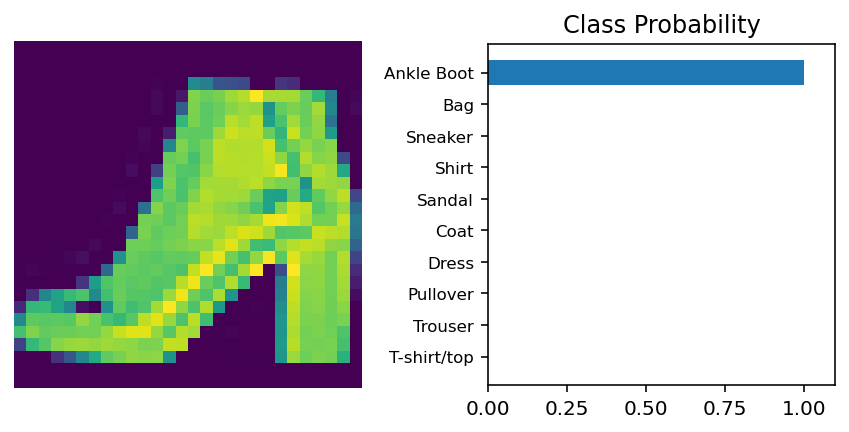

In [15]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model_0(img)
ps = torch.exp(logps)

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')